In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
df = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv', encoding='mac-roman', skipfooter=5, engine='python', parse_dates=['FECHA'], date_parser=lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [4]:
df.fillna(0, inplace=True)

In [5]:
df['Activos'] = df['CASOS'] - (df['Fallecidos'] + df['Recuperados'])

In [6]:
df.set_index('FECHA', inplace=True)

In [7]:
df

,CCAA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
FECHA,,,,,,,
2020-02-20,AN,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,AR,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,AS,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,IB,1.0,0.0,0.0,0.0,0.0,1.0
2020-02-20,CN,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2020-04-12,ML,101.0,43.0,3.0,2.0,18.0,81.0
2020-04-12,MC,1463.0,543.0,94.0,101.0,353.0,1009.0
2020-04-12,NC,4092.0,1693.0,124.0,239.0,695.0,3158.0


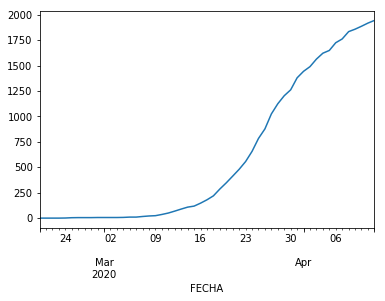

In [8]:
ax = df[df['CCAA']=='CN']['CASOS'].plot()

In [9]:
df[df['CCAA']=='CN']['CASOS'].plot(ax=ax, kind='bar')

In [10]:
ax.figure.savefig('a.png')